In [1]:
import pickle
import pandas as pd
import os
import random
import cv2
from matplotlib import pyplot as plt
import splitfolders
import numpy as np
from torchsummary import summary
from torch import nn
import copy
import time
import timm
import torch
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import torch
from torch import nn, optim
import sys
from time import sleep
from datetime import datetime
from torchvision.datasets.folder import default_loader
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




# Testing

In [24]:
def show_ten_img_test(img_arr, indices, classname, filter_type, title_top):
    f, axarr = plt.subplots(2,5, figsize = (20, 10))
    pos = 'Original_positive'
    neg = 'Original_negative'
    f.suptitle(title_top)
    for i in range(0, 5):
        # Plot original
        org_path = indices[i]
        img_org = cv2.imread(org_path)
        axarr[0,i].imshow(img_org)
        titel = 'original' + classname
        axarr[0,i].set_title(titel)

        # Plot with filter
        '''img = np.transpose(img_arr[i].numpy(), (1, 2, 0))
        mean = np.array(IMAGENET_DEFAULT_MEAN)
        std = np.array(IMAGENET_DEFAULT_STD)
        img = img*std+mean'''
        if filter_type=='Clahe':
            axarr[1,i].imshow(img_arr[i], cmap='gray')
        else:
            axarr[1,i].imshow(img_arr[i])
        axarr[1,i].set_title(filter_type)

    plt.show()

In [14]:
images_neg = ['Images/test/Negative/00822.jpg', 'Images/test/Negative/00283.jpg', 'Images/test/Negative/03627.jpg', 'Images/test/Negative/05784.jpg', 'Images/test/Negative/07195.jpg']
images_pos = ['Images/test/Positive/05359.jpg', 'Images/test/Positive/01728.jpg', 'Images/test/Positive/00215.jpg', 'Images/test/Positive/03230.jpg', 'Images/test/Positive/02444.jpg']

## Bilat

In [15]:
def bilat(image_path, parameter_dict):
    img = cv2.imread(image_path)
    ## OBS: not sure about d, sigmaColor and sigmaSpace (15, 75, 75)
    image = cv2.bilateralFilter(img, parameter_dict['d'], parameter_dict['sigmaColor'], parameter_dict['sigmaSpace'])
    return image

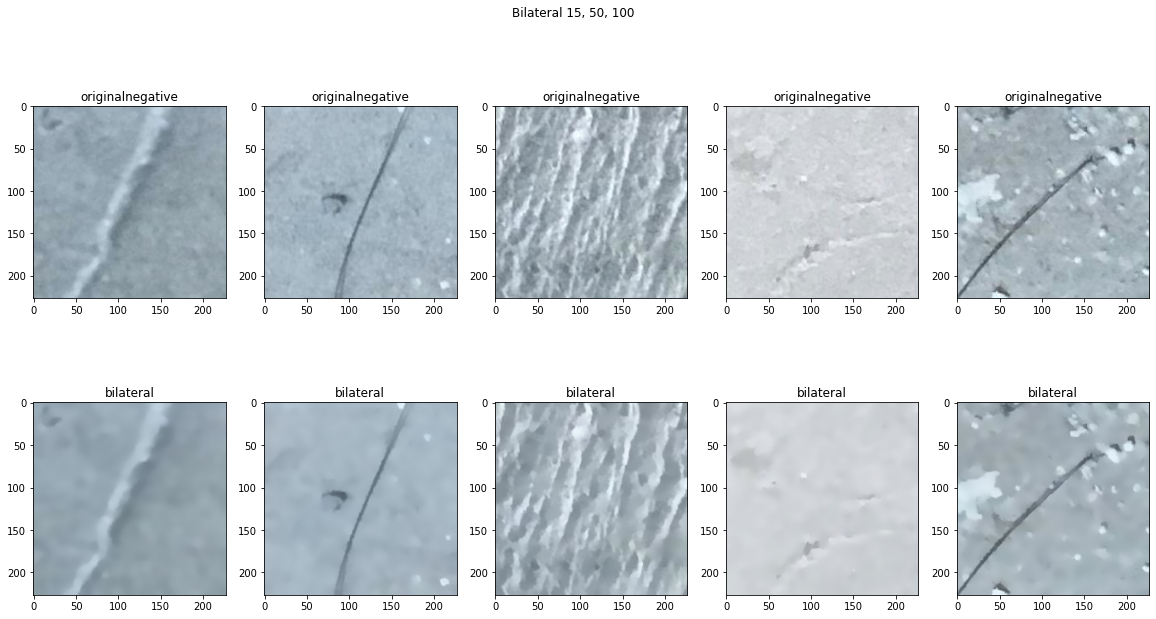

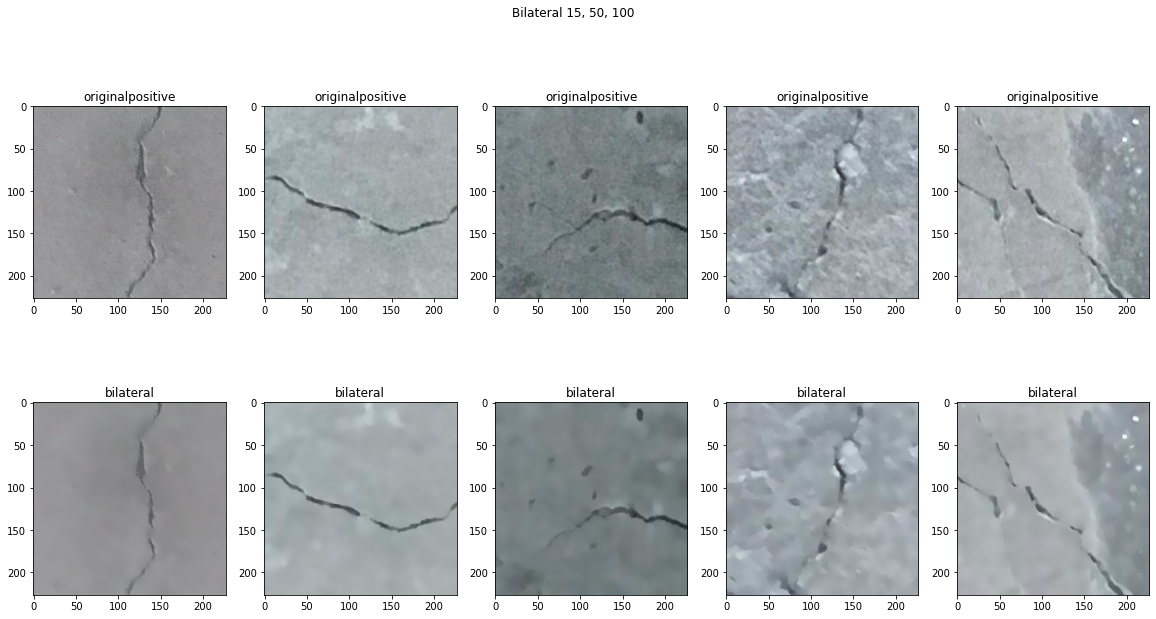

In [16]:
parameter_dict = {'gray_scale': False, 'd': 15, 'sigmaColor': 50, 'sigmaSpace': 100}
neg = []
pos = []
for i in range(5):
    neg.append(bilat(images_neg[i], parameter_dict))
    pos.append(bilat(images_pos[i], parameter_dict))

title = f'Bilateral {parameter_dict["d"]}, {parameter_dict["sigmaColor"]}, {parameter_dict["sigmaSpace"]}' 
show_ten_img_test(neg, images_neg, 'negative', 'bilateral', title)
show_ten_img_test(pos, images_pos, 'positive', 'bilateral', title)

## Canny

In [17]:
def canny(image_path, parameter_dict):
    img = cv2.imread(image_path)
    ## Treshold 1 and 2
    edge = cv2.Canny(img, parameter_dict['low_tresh'], parameter_dict['high_tresh'])
    return edge

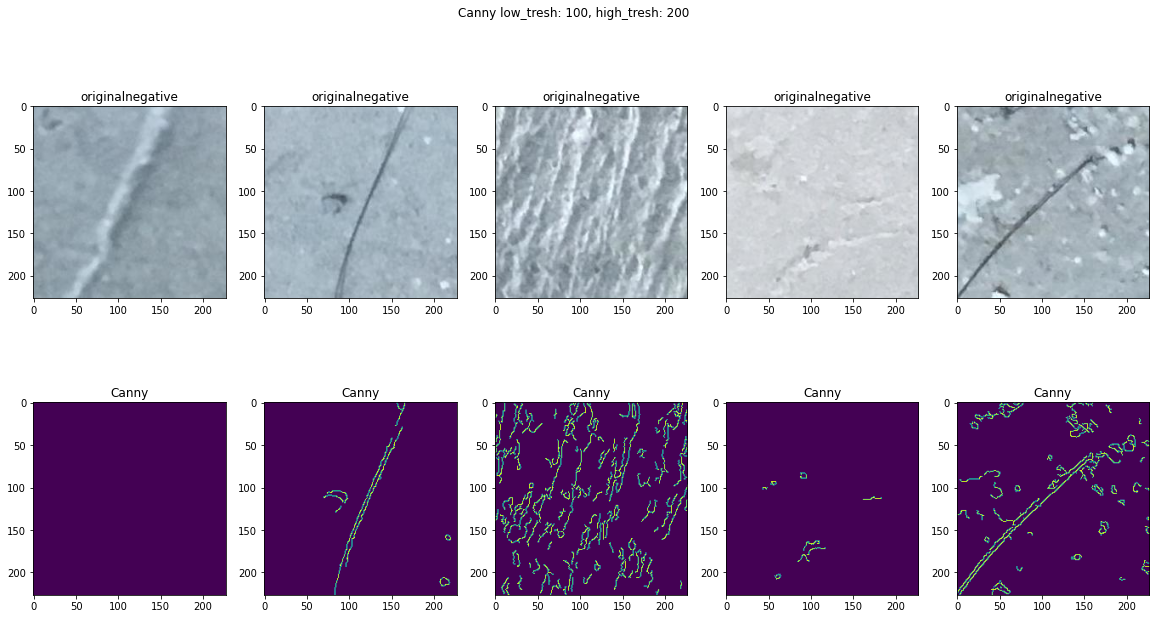

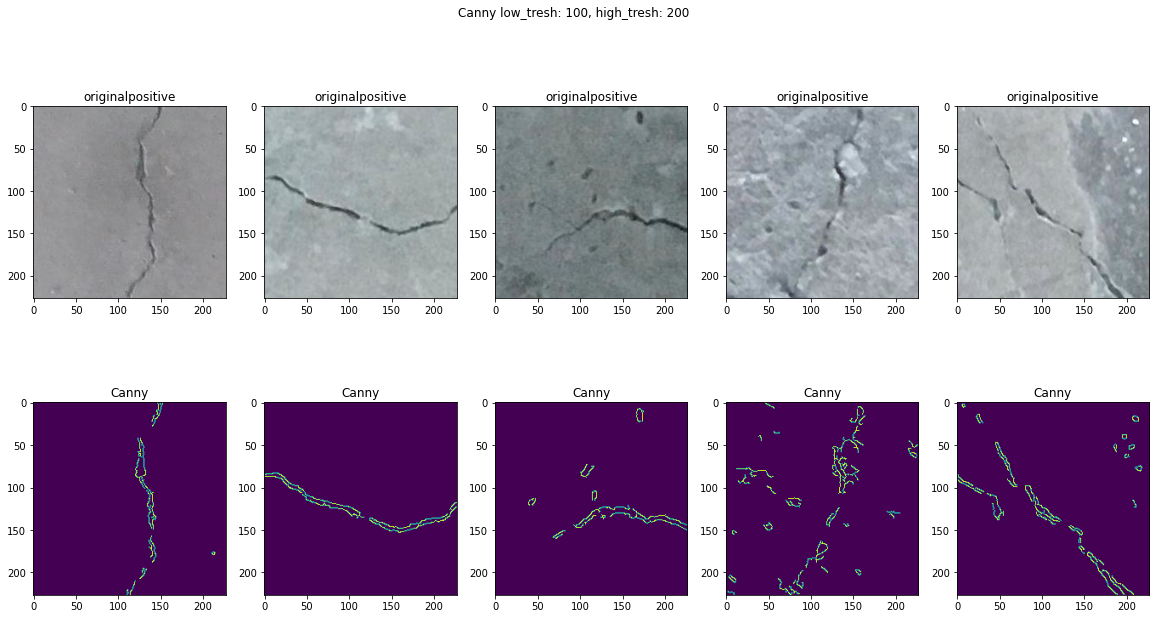

In [18]:
parameter_dict = {'gray_scale': False, 'low_tresh': 100, 'high_tresh': 200}

neg = []
pos = []
for i in range(5):
    neg.append(canny(images_neg[i], parameter_dict))
    pos.append(canny(images_pos[i], parameter_dict))

title = f'Canny low_tresh: {parameter_dict["low_tresh"]}, high_tresh: {parameter_dict["high_tresh"]}' 
show_ten_img_test(neg, images_neg, 'negative', 'Canny', title)
show_ten_img_test(pos, images_pos, 'positive', 'Canny', title)

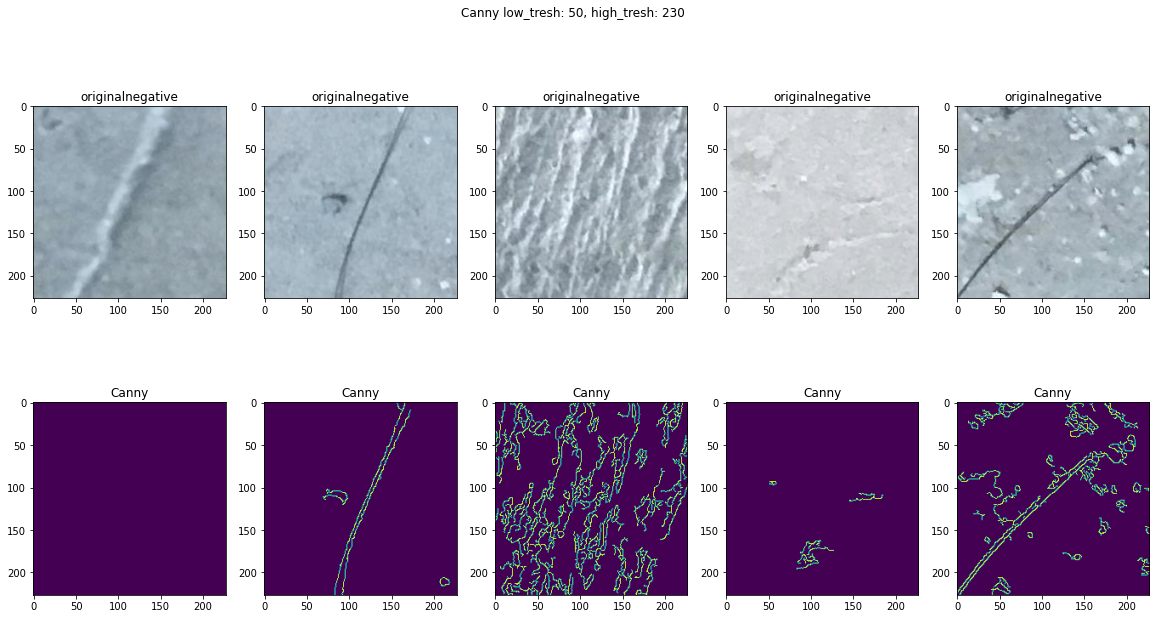

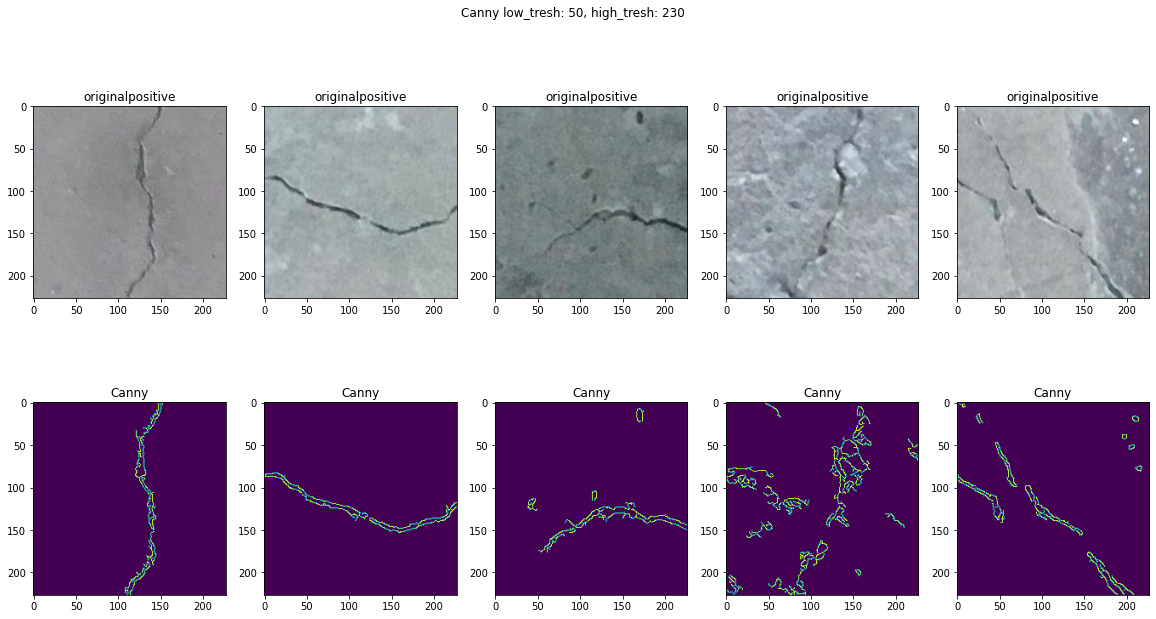

In [19]:
parameter_dict = {'gray_scale': False, 'low_tresh': 50, 'high_tresh': 230}

neg = []
pos = []
for i in range(5):
    neg.append(canny(images_neg[i], parameter_dict))
    pos.append(canny(images_pos[i], parameter_dict))

title = f'Canny low_tresh: {parameter_dict["low_tresh"]}, high_tresh: {parameter_dict["high_tresh"]}' 
show_ten_img_test(neg, images_neg, 'negative', 'Canny', title)
show_ten_img_test(pos, images_pos, 'positive', 'Canny', title)

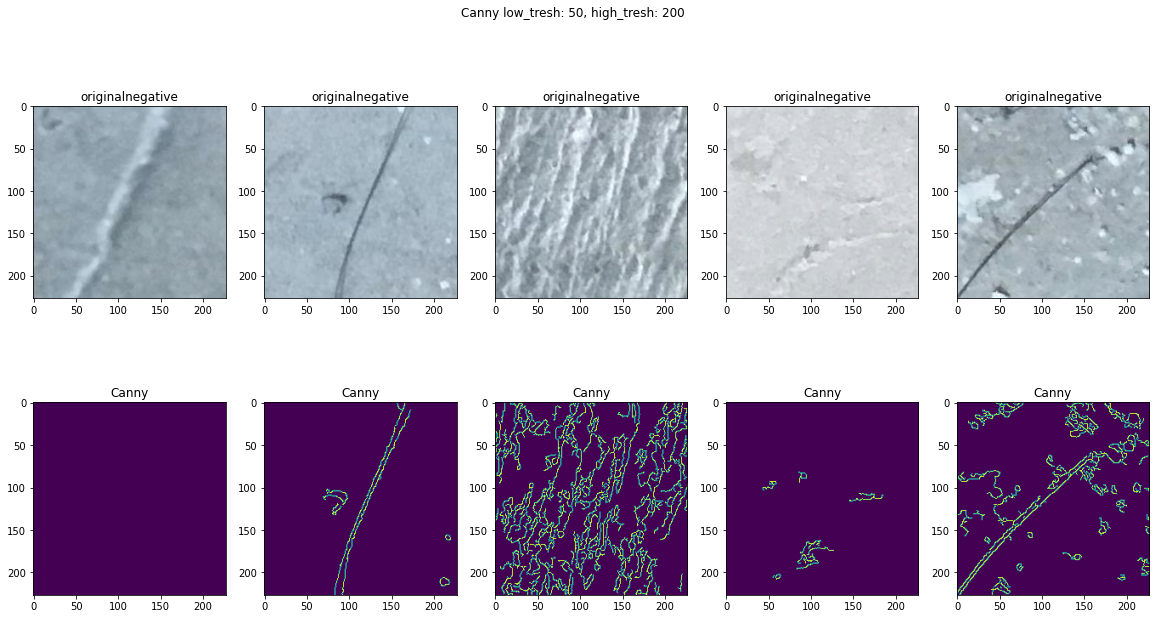

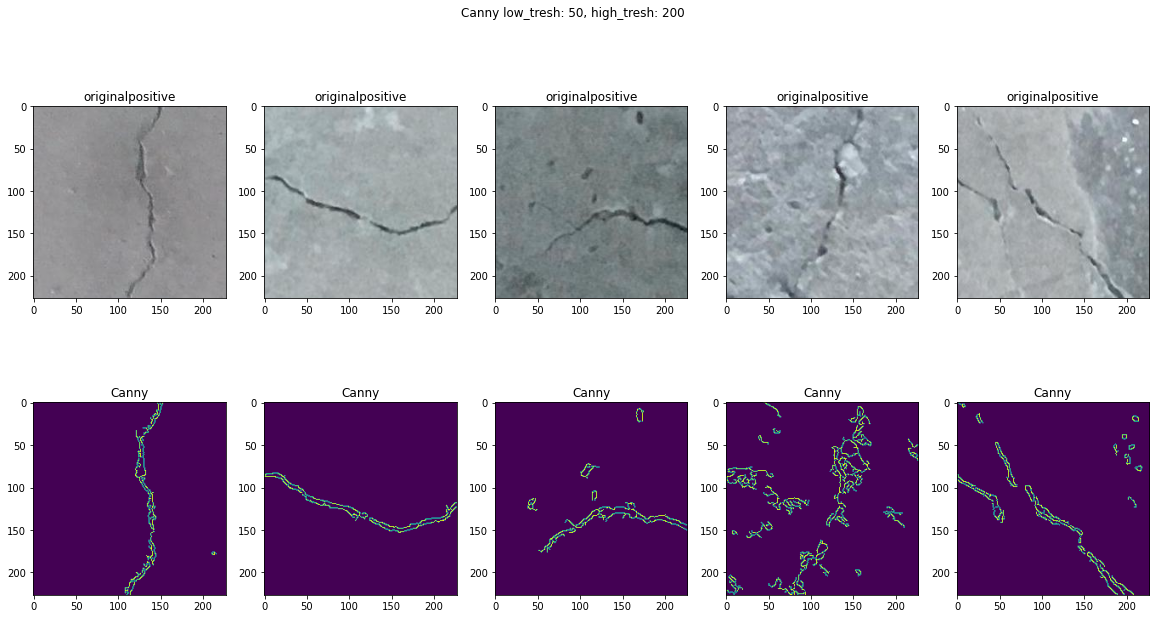

In [20]:
parameter_dict = {'gray_scale': False, 'low_tresh': 50, 'high_tresh': 200}

neg = []
pos = []
for i in range(5):
    neg.append(canny(images_neg[i], parameter_dict))
    pos.append(canny(images_pos[i], parameter_dict))

title = f'Canny low_tresh: {parameter_dict["low_tresh"]}, high_tresh: {parameter_dict["high_tresh"]}' 
show_ten_img_test(neg, images_neg, 'negative', 'Canny', title)
show_ten_img_test(pos, images_pos, 'positive', 'Canny', title)

## CLAHE

In [21]:
def clahe(image_path, parameter_dict):
    img = cv2.imread(image_path, 0)
    ## OBS: not sure about clipLimit=2.0, tileGridSize=(8,8)
    clahe = cv2.createCLAHE(clipLimit=parameter_dict['clipLimit'], tileGridSize=parameter_dict['tileGridSize'])
    enhanced = clahe.apply(img)
    return enhanced

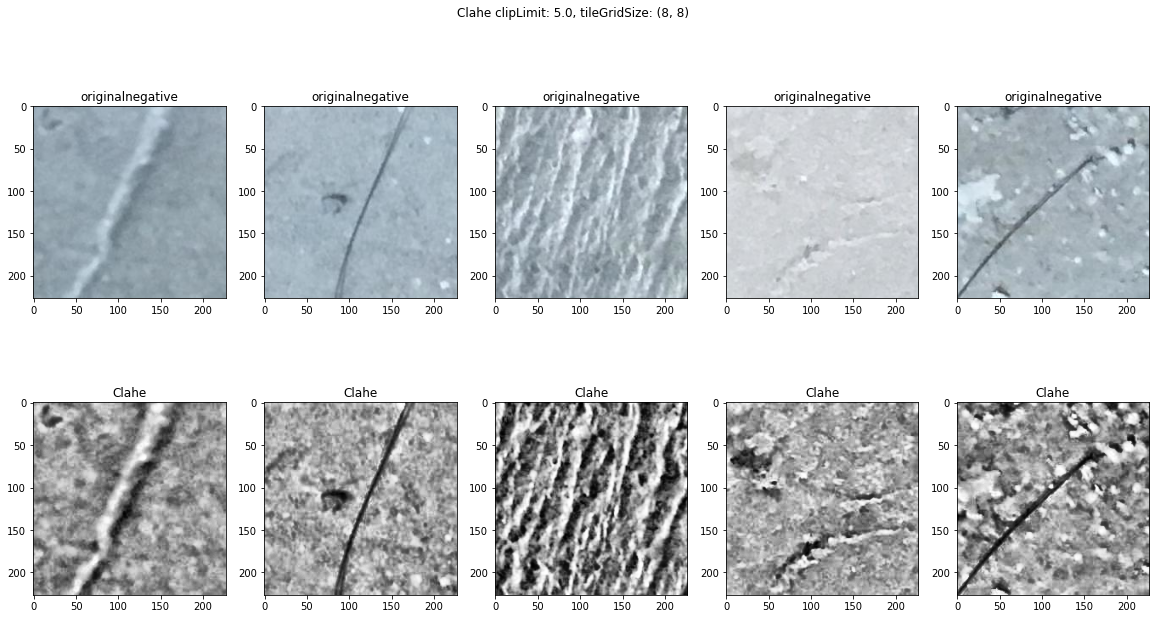

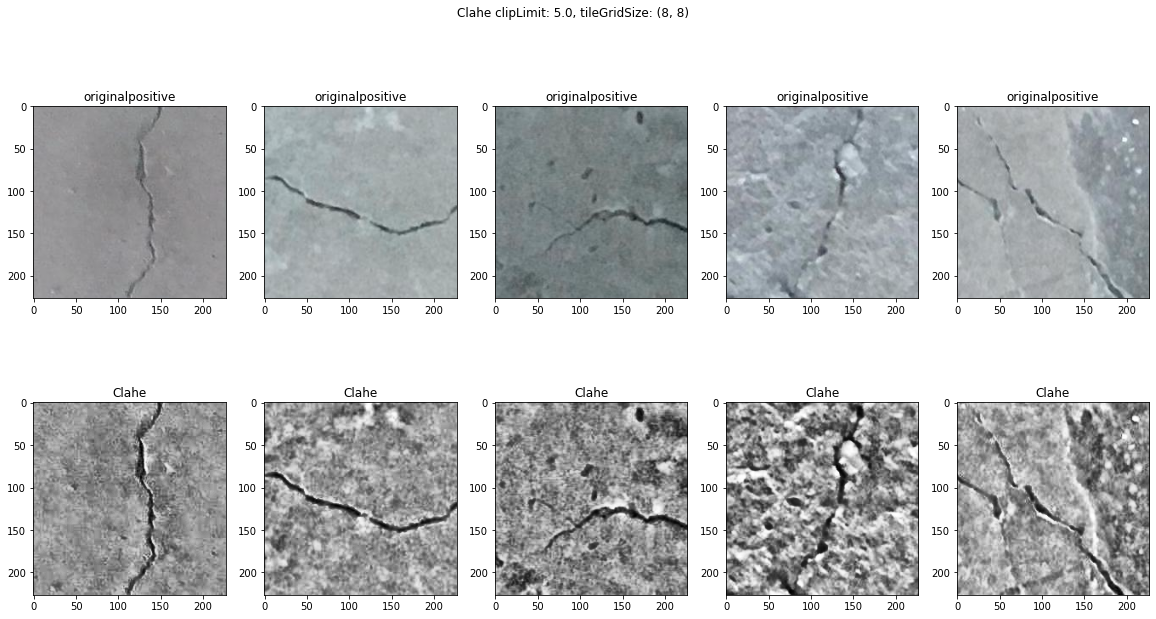

In [25]:
parameter_dict = {'gray_scale': False, 'clipLimit': 5.0, 'tileGridSize': (8,8)}
# ClipLimit:  threshold for contrast limiting.
neg = []
pos = []
for i in range(5):
    neg.append(clahe(images_neg[i], parameter_dict))
    pos.append(clahe(images_pos[i], parameter_dict))

title = f'Clahe clipLimit: {parameter_dict["clipLimit"]}, tileGridSize: {parameter_dict["tileGridSize"]}' 
show_ten_img_test(neg, images_neg, 'negative', 'Clahe', title)
show_ten_img_test(pos, images_pos, 'positive', 'Clahe', title)

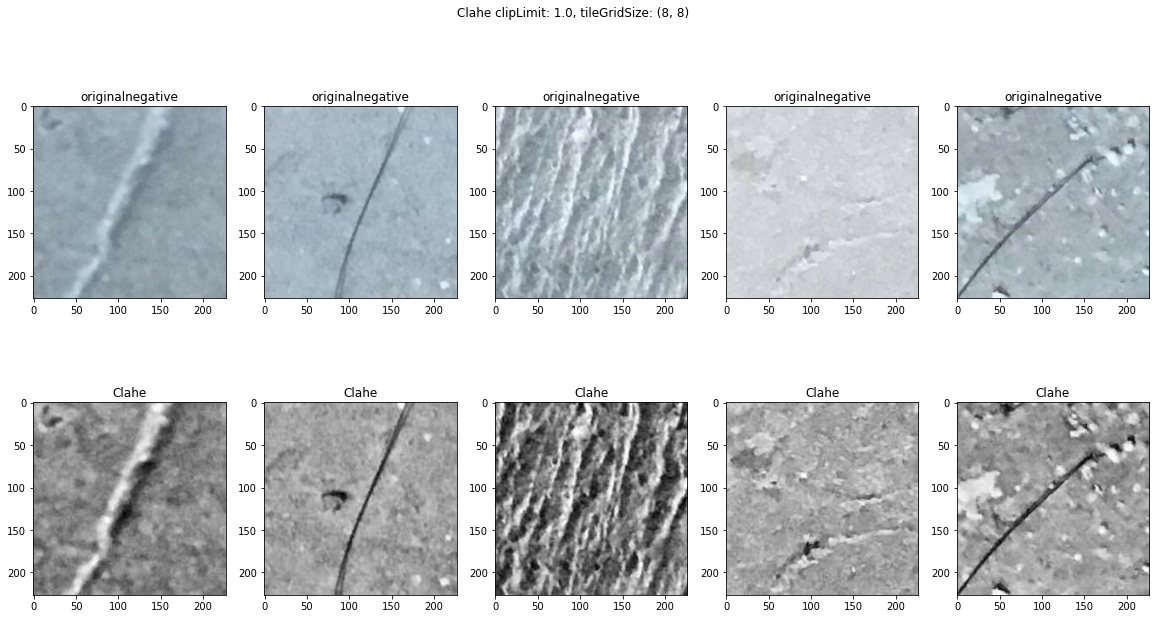

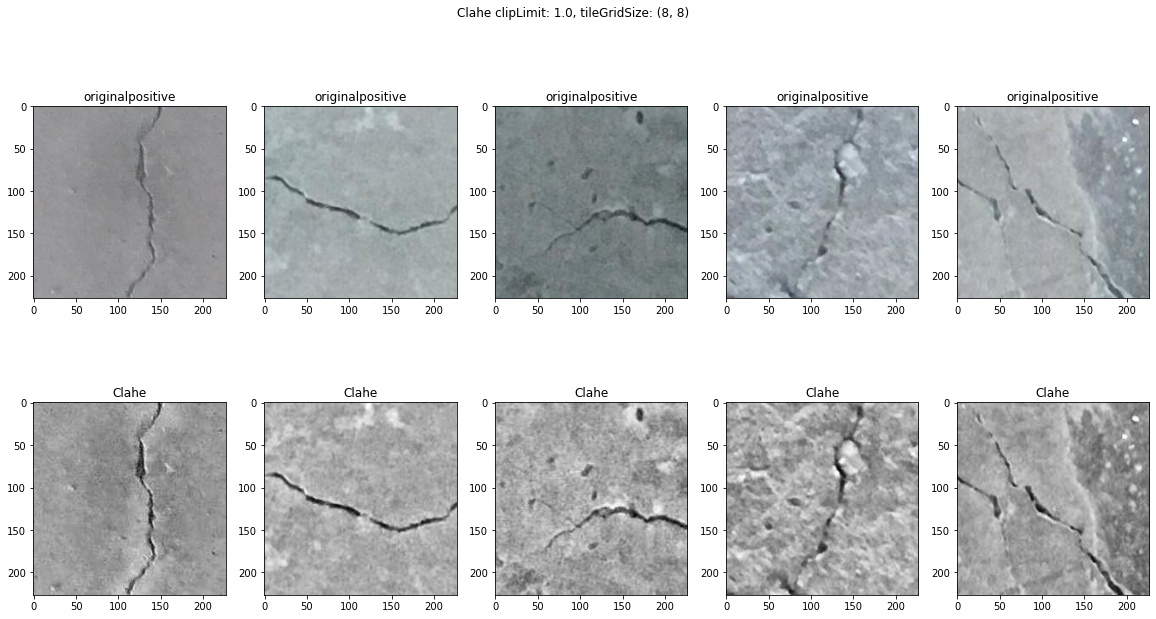

In [26]:
parameter_dict = {'gray_scale': False, 'clipLimit': 1.0, 'tileGridSize': (8,8)}

# ClipLimit:  threshold for contrast limiting.
neg = []
pos = []
for i in range(5):
    neg.append(clahe(images_neg[i], parameter_dict))
    pos.append(clahe(images_pos[i], parameter_dict))

title = f'Clahe clipLimit: {parameter_dict["clipLimit"]}, tileGridSize: {parameter_dict["tileGridSize"]}' 
show_ten_img_test(neg, images_neg, 'negative', 'Clahe', title)
show_ten_img_test(pos, images_pos, 'positive', 'Clahe', title)